In [1]:
import numpy as np
import pandas as pd
import pystan
from scipy.stats import norm, multivariate_normal, invwishart, invgamma
from statsmodels.tsa.stattools import acf
import datetime
import sys
import os

from codebase.plot import * 
from codebase.data import * 
from codebase.file_utils import save_obj, load_obj

%matplotlib inline

%load_ext autoreload
%autoreload 2

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [19]:
# existing_directory = None
# task_handle = 'test'
# if existing_directory is None:
#     nowstr = datetime.datetime.now().strftime('%Y%m%d_%H%M%S_') # ISO 8601 format
#     log_dir =  "./log/"+nowstr+"%s/" % task_handle
#     if not os.path.exists(log_dir):
#         os.makedirs(log_dir)
# else:
#     log_dir = existing_directory
#     if log_dir[-1] != "/":
#         print("\n\nAppending `/`-character at the end of directory")
#         log_dir = log_dir+ "/"


In [8]:
log_dir = "./log/20191022_122541_bin_m1/"
data = load_obj('data', log_dir)
ps = load_obj('ps', log_dir)
ps.keys()

dict_keys(['beta', 'Phi_cov', 'sigma', 'alpha', 'Theta'])

In [18]:
# nsim_data = 500
# random_seed = 4
# data = gen_data_binary(nsim_data, off_diag_residual=False,
#             random_seed = random_seed)
# data

In [17]:
# data['sigma_prior'] = np.diag(np.linalg.inv(np.cov(data['y'], rowvar=False)))
# print("\n\nN = %d, J= %d, K =%d"%(data['N'],data['J'], data['K']))

# stan_data = dict(N = data['N'], K = data['K'], J = data['J'],
# DD = data['D'], sigma_prior = data['sigma_prior'])

In [15]:
# with open('./codebase/stan_code/discr/CFA/model2.stan', 'r') as file:
#     model_code = file.read()
# param_names = ['beta', 'Phi_cov', 'sigma', 'alpha',
#     'Theta', 'Omega', 'zz' , 'uu']

# print_model = True
# if bool(print_model):
#         print(model_code)
# file = open(log_dir+"model.txt", "w")
# file.write(model_code)
# file.close()

In [16]:
# print("\n\nCompiling model")
# sm = pystan.StanModel(model_code=model_code, verbose=False)

# print("\n\nSaving compiled model in directory %s"%log_dir)
# save_obj(sm, 'sm', log_dir)

In [9]:
num_chains = 1
num_samples = 1000
num_warmup = 1000
num_iter = num_samples + num_warmup

In [10]:
# fit_run = sm.sampling(data=stan_data,
#     iter=num_samples + num_warmup,
#     warmup=num_warmup, chains=num_chains)

# print("\n\nSaving fitted model in directory %s"%log_dir)
# save_obj(fit_run, 'fit', log_dir)

In [11]:
# print("\n\nSaving posterior samples in %s"%log_dir)


# stan_samples= fit_run.extract(permuted=False, pars=param_names)  # return a dictionary of arrays

# if num_chains ==1:
#     ps = dict()
#     for name in param_names:
#         ps[name] = np.squeeze(stan_samples[name])
# else:
#     ps = stan_samples
#     save_obj(ps, 'ps', log_dir)


In [12]:
post_df = post_summary(ps['beta'])
post_df['data'] = flatten_df(data['beta'], 'y')['y']
post_df.to_csv('log/plot_data/binary/exp1_model2.csv', index=False)

In [25]:
zcor = np.empty_like(ps['Phi_cov'])
for i in range(num_samples):
    zcor[i] = C_to_R(ps['Phi_cov'][i])

In [26]:
omega2 = np.empty_like(ps['Omega'])
for i in range(num_samples):
    omega2[i] = C_to_R(ps['Omega'][i])
    

In [28]:
np.round(np.mean(omega2, axis=0), 1)

array([[ 1. ,  0.3,  0.3,  0.1, -0.1,  0.1],
       [ 0.3,  1. ,  0.3,  0.2,  0.3, -0. ],
       [ 0.3,  0.3,  1. , -0. ,  0.3, -0.1],
       [ 0.1,  0.2, -0. ,  1. ,  0.3,  0.4],
       [-0.1,  0.3,  0.3,  0.3,  1. ,  0.1],
       [ 0.1, -0. , -0.1,  0.4,  0.1,  1. ]])

In [13]:
%%opts Layout [fig_size=200]
plots = []
for j in range(data['J']):
    for k in range(data['K']):
        plots.append(plot_trace(ps['beta'][:,j,k],
             true_value=data['beta'][j,k],
             title = 'Posterior distribution for beta(%s,%s)'%(j,k)).\
                     options(fig_inches=8, aspect=3))
layout = hv.Layout(plots).options(show_title = True,
                                  vspace = .3,
                                  absolute_scaling=False,
                                  normalize=False) # use same y-range for all plots?

layout.cols(2)


:Layout
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_0_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_0_comma_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_1_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_1_comma_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_2_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_2_comma_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_3_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_3_comma_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_4_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_4_comma_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_5_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_5_comma_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)

## Residual Analysis

In [11]:
def get_residuals(ps_u, by_axis, absval = True, sort=False):
    """
    params
    ps_u posterior samples of u
    by_axis 0=residuals per iterm, 1=residuals per subject
    """
    mean_u = np.mean(ps_u, axis=0) #mean posterior residual matrix
    std_u = np.sqrt(np.mean(ps_u**2, axis=0)- mean_u**2) #std of posterior residual matrix
    if absval:
        res = pd.DataFrame(np.sum(np.abs(mean_u/std_u), axis=by_axis)).reset_index()
    else:
        res = pd.DataFrame(np.sum(mean_u/std_u, axis=by_axis)).reset_index()
    res.columns = ['index', 'residual']
    
    if sort:
        res.sort_values('residual', ascending=False, inplace=True)
    return res

get_residuals(ps['uu'], 1, True, True).head()


,index,residual
414,414,56.171387
300,300,54.760216
386,386,49.167780
308,308,45.518849
364,364,45.103340


In [36]:
# %%opts Bars {+axiswise} [width=1000, height=300, ] 
res = get_residuals(ps['uu'], 1, False, True)

hv.Bars(res[:20], hv.Dimension('index'), 'residual',\
        label='Top 20 Residuals').options(color='blue', xrotation=90).options(fig_inches=8, aspect=3)


:Bars   [index]   (residual)

In [37]:
# Top 10
data['yy'][res['index'].values][:10]

array([[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7],
       [7, 7, 7, 7, 7, 7, 7, 6, 1, 7, 1, 1, 6, 6, 7],
       [7, 7, 7, 6, 7, 7, 7, 5, 3, 7, 6, 2, 7, 7, 7],
       [1, 7, 7, 7, 7, 7, 7, 7, 3, 7, 7, 4, 5, 5, 4],
       [7, 7, 7, 7, 7, 7, 7, 6, 2, 6, 7, 2, 5, 5, 6],
       [7, 7, 7, 6, 7, 7, 7, 7, 4, 6, 5, 5, 7, 7, 6],
       [7, 5, 7, 7, 7, 7, 7, 5, 1, 7, 7, 3, 7, 5, 5],
       [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7],
       [1, 7, 7, 7, 6, 7, 7, 7, 7, 7, 4, 4, 5, 4, 6],
       [6, 7, 7, 7, 7, 7, 7, 7, 2, 4, 2, 4, 5, 7, 7]])

In [16]:
def get_heatmap_data(ps_u):
    """
    params
    ps_u posterior samples of u
    """
    mean_u = np.mean(ps_u, axis=0) #mean posterior residual matrix
    std_u = np.sqrt(np.mean(ps_u**2, axis=0)- mean_u**2) #std of posterior residual matrix
    res = mean_u/std_u
    return res
heatmap_data = get_heatmap_data(ps['uu'])

pd.DataFrame(heatmap_data).to_csv("../dat/heatmap_data.csv", index=False)

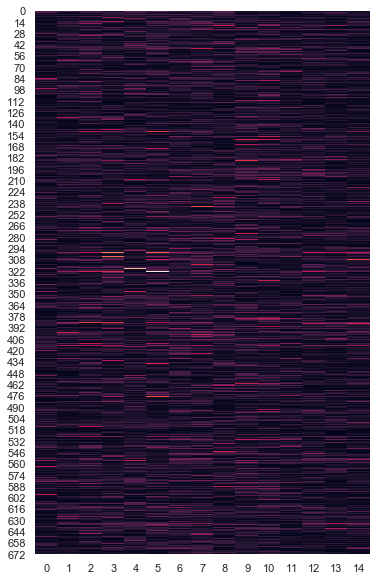

In [14]:
sns.set()
plt.figure(figsize=(6,10))
ax = sns.heatmap(np.abs(heatmap_data), cbar = False )

## PPP values

In [ ]:
## Previously used functions
def ff (yy, model_mu, model_Sigma, p=15, q=5):
    sample_S = np.cov(yy, rowvar=False)
    sample_m = np.mean(yy, axis=0)
    n_data = yy.shape[0]

    term1 = np.log(det(model_Sigma))
    term2 = inv(model_Sigma) @ (sample_S + (sample_m - model_mu) @  (sample_m - model_mu))
    term3 = np.log(det(sample_S)) + p + q

    ff = 0.5 * n_data * ( term1 + np.trace(term2)) - term3

    return ff


def ff2(yy, model_mu, model_Sigma, p=15, q=5):
    sample_S = np.cov(yy, rowvar=False)
    ldS = np.log(det(sample_S))
    iSigma = inv(model_Sigma)
    ldSigma = np.log(det(model_Sigma))
    n_data = yy.shape[0]
    ff2 =(n_data-1)*(ldSigma+np.sum(np.diag(sample_S @ iSigma))-ldS-p)
    return ff2

In [23]:
mle_est = dict()
mle_est['Sigma'] = np.cov(data['y'], rowvar=False)
mle_est['mu'] = np.mean(data['y'], axis=0)
def compute_D1(yy):   
    return multivariate_normal.logpdf(yy, mean=mle_est['mu'], cov=mle_est['Sigma'])

In [24]:
def compute_D2(yy, mcmc_iter):    
    D2 = multivariate_normal.logpdf(yy,
                               mean= ps['alpha'][mcmc_iter],
                               cov = ps['Marg_cov'][mcmc_iter])
    return D2

def compute_D(mcmc_iter, pred=True):
    if pred == True:
        y_pred=multivariate_normal.rvs(mean= ps['alpha'][mcmc_iter],
                        cov=ps['Marg_cov'][mcmc_iter],
                       size = data['y'].shape[0])
        return compute_D1(y_pred) - compute_D2(y_pred, mcmc_iter)

    else:
        return compute_D1(data['y']) - compute_D2(data['y'], mcmc_iter)
    
    
compute_D(100, False)

array([ 1.38000689e+00, -2.31209945e-01, -3.80924522e-01,  7.18602979e+00,
       -1.33741615e+00,  2.50268869e-01, -6.29550884e-01,  1.04554605e+00,
       -7.22497180e-01, -6.94663179e-01, -8.39881312e-01,  4.85514823e-01,
        1.07632688e+00,  2.47011711e+00,  2.48284156e+00,  1.01117077e+00,
        1.71173078e+00,  1.35877871e-02, -1.19627319e+00,  1.25604262e+00,
       -4.97069985e-02, -1.88251743e-01, -1.43389727e+00,  2.70252065e-01,
        1.62535799e-01,  9.26410873e-01, -5.42017551e-01,  2.55153507e+00,
        3.41772154e-01,  2.65776239e+00,  1.28898914e+00,  1.36323812e+01,
        2.74715231e+00,  1.37913208e-01, -1.03224867e+00, -1.10862143e+00,
       -9.47025435e-01,  9.46019134e-02,  7.81000821e+00,  1.19661709e+00,
       -1.10457685e+00, -3.70619180e-01, -1.14803343e+00,  5.50668515e-01,
       -1.29231424e+00, -3.98385780e-01, -5.07838025e-02, -8.55087111e-01,
       -6.49224627e-01,  5.78428893e-02,  3.36231451e-02,  2.07766799e-01,
        2.40198895e+00, -

In [25]:
mcmc_length = 1000
Ds = np.empty((mcmc_length,2))
for mcmc_iter in range(mcmc_length):
    Ds[mcmc_iter,0] = -2*np.sum(compute_D(mcmc_iter, pred=False))
    Ds[mcmc_iter,1] = -2*np.sum(compute_D(mcmc_iter, pred=True))

In [28]:
Ds[:,1]

array([ 774.47603536,  748.42044138,  668.02198707,  850.37493993,
        773.12522139,  843.94373592,  812.82011808,  859.43992283,
        862.18186065,  817.60953389,  941.37196381,  815.39851426,
        830.78097616,  836.95688356,  749.88723904,  801.22126836,
        814.09755598,  786.70351187,  808.12096509,  869.77143281,
        866.85575686,  846.32752795,  618.80064119,  747.62028955,
        752.81220012,  813.40574663,  758.09387012,  797.09104783,
        650.53503349,  689.84612171,  767.36279265,  859.11225733,
        694.31168659,  753.32428952,  711.27430293,  730.46010973,
        689.57570544,  705.33128208,  669.61645008,  622.01585039,
        747.90507817,  873.12900544,  931.11298885,  845.82376564,
        870.30750999,  951.66970993,  984.69645933, 1209.11339287,
       1027.96427774,  983.47084193, 1026.22534253, 1037.35444582,
        950.86983227,  790.92410627,  813.25397389,  755.68306016,
        574.8442504 ,  671.46341294,  657.0864447 ,  549.23842